# Machine Learning Methods

In [37]:
# data wrangling
import pandas as pd
import numpy as np
import pyreadr

# visualizacion 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import colors
import matplotlib.ticker as ticker
%matplotlib inline

# apoyo
import math
import re
import os
import unicodedata
import time
from datetime import datetime
import scipy.stats as st


## main functions

In [38]:
def func_accents(dataframe,var_obj:str):
  """ Esta función remueve los non-ASCII caracteres de una pandas series (dataframe) """
  y = dataframe[var_obj].str.encode('ascii', 'ignore').str.decode('ascii')
  return y


## Import raw data

In [39]:
mainpath = "data/"

## Hojas de Vida Creadas

In [40]:
filename = "Hojas de Vida Creadas.xls"
fullpath = os.path.join(mainpath, filename)
df_cv = pd.read_excel(fullpath)
display(df_cv.head(5))

,Primer Apellido,Segundo Apellido,Primer Nombre,Segundo Nombre,Tipo de Documento,N° Identificación,Nacionalidad,No. Pasaporte,Fecha de Nacimiento,Edad,...,POLÍTICA DE PRIVACIDAD Y TRATAMIENTO DE DATOS PERSONALES HQ5 S.A.S.,subformulario 1,subformulario 2,subformulario 3,subformulario 4,subformulario 5,subformulario 6,¿Por donde te enteraste?,ID system,Bloqueado por antecedentes
0,FIGUEROA,ROMERO,MANUEL,FERNANDO,CEDULA DE CIUDADANIA,1073505669,COLOMBIANO,NaN,1988-09-24 00:00:00,33.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3960020000044776479,False
1,ISAZA,LOPEZ,GEHAN,HUMBERTO,CEDULA DE CIUDADANIA,94385213,Colombiano,NaN,1973-05-26 00:00:00,49.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,Voz_a_voz,3960020000044753484,False
2,MARTÍNEZ,NaN,ADRIANA,NaN,CEDULA DE CIUDADANIA,37626684,COLOMBIANA,NaN,1974-05-15 00:00:00,48.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3960020000044747635,False
3,Espinosa,Florez,Digmar,Roberto,CEDULA DE CIUDADANIA,1093141477,NaN,NaN,1996-02-03 00:00:00,26.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,Computrabajo,3960020000044745696,False
4,RESTREPO,FORONDA,EDWAR,ANDRES,CEDULA DE CIUDADANIA,71386478,NaN,NaN,1982-01-21 00:00:00,40.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,Computrabajo,3960020000044745690,False


In [41]:
df_cv.columns

Index(['Primer Apellido', 'Segundo Apellido', 'Primer Nombre',
       'Segundo Nombre', 'Tipo de Documento', 'N° Identificación',
       'Nacionalidad', 'No. Pasaporte', 'Fecha de Nacimiento', 'Edad',
       'Genero de nacimiento', 'Identidad Genero', 'Orientacion Sexual',
       'Departamento de Residencia', 'Barrio-', 'Correo Electrónico',
       'Telefono', 'Celular', 'Celular Alterno', 'Cargos', 'Added Time',
       'Added User', 'HV con Contrato Activo', 'Departamento de Expedición',
       'Nivel Educativo', 'NUCLEO FAMILIAR', 'Referencias Personales',
       'Inicio', 'Fin', 'Minutos trancurridos', 'Modified User',
       'Modified Time', 'HV actualizada', 'N° de Hijos',
       'POLÍTICA DE PRIVACIDAD Y TRATAMIENTO DE DATOS PERSONALES HQ5 S.A.S.',
       'subformulario 1', 'subformulario 2', 'subformulario 3',
       'subformulario 4', 'subformulario 5', 'subformulario 6',
       '¿Por donde te enteraste?', 'ID system', 'Bloqueado por antecedentes'],
      dtype='object')

In [1]:
func_accents(df_cv,'Tipo de Documento').value_counts(dropna=False)
func_accents(df_cv,'Nacionalidad').value_counts(dropna=False)
func_accents(df_cv,'Genero de nacimiento').value_counts(dropna=False)
func_accents(df_cv,'Departamento de Residencia').value_counts(dropna=False)
# func_accents(df_cv,'Cargos').value_counts(dropna=False)
func_accents(df_cv,'Orientacion Sexual').value_counts(dropna=False)

NameError: name 'func_accents' is not defined

## EDA

In [ ]:
list_vars = ['Tipo de Documento','N° Identificación','Nacionalidad','Genero de nacimiento','Edad','N° de Hijos','Nivel Educativo','Cargos','Departamento de Residencia']
df_req = df_cv[list_vars]
df_req.head()

,Tipo de Documento,N° Identificación,Nacionalidad,Genero de nacimiento,Edad,N° de Hijos,Nivel Educativo,Cargos,Departamento de Residencia
0,CEDULA DE CIUDADANIA,1073505669,COLOMBIANO,MASCULINO,33.0,0.0,MEDIA ACADEMICA (BACHILLER),NaN,CUNDINAMARCA
1,CEDULA DE CIUDADANIA,94385213,Colombiano,MASCULINO,49.0,1.0,MEDIA ACADEMICA (BACHILLER),Calzado rogger - Solador,VALLE DEL CAUCA
2,CEDULA DE CIUDADANIA,37626684,COLOMBIANA,FEMENINO,48.0,NaN,NaN,NaN,CUNDINAMARCA
3,CEDULA DE CIUDADANIA,1093141477,NaN,NaN,26.0,NaN,NaN,NaN,ANTIOQUIA
4,CEDULA DE CIUDADANIA,71386478,NaN,NaN,40.0,NaN,NaN,NaN,ANTIOQUIA


In [ ]:
# revisar información dentro de la variable
var_ref = 'Tipo de Documento'
df_req[var_ref].value_counts(dropna=False)

CEDULA DE CIUDADANIA               64542
PERMISO ESPECIAL DE PERMANENCIA      424
PERMISO POR PROTECCION TEMPORAL      272
CEDULA DE EXTRANJERIA                260
PASAPORTE                             22
TARJETA DE IDENTIDAD                   7
CARNE DIPLOMATICO                      4
CEDULA&#x20;DE&#x20;CIUDADANIA         2
SALVOCONDUCTO DE PERMANENCIA           1
CEDULA DE CIUDADANÍA                   1
Name: Tipo de Documento, dtype: int64

In [ ]:
# realizar correccion
df_req[var_ref] = np.where(
    pd.isnull(df_req[var_ref]) ,
    'SIN_INFORMACION',
    np.where(
        df_req[var_ref].str.contains('DADAN', regex=False) ,
        'CEDULA DE CIUDADANIA',
        df_req[var_ref]
        )
    )
# revisar si el resultado es el deseado
df_req[var_ref].value_counts(dropna=False)

C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\3685971085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req[var_ref] = np.where(


CEDULA DE CIUDADANIA               64545
PERMISO ESPECIAL DE PERMANENCIA      424
PERMISO POR PROTECCION TEMPORAL      272
CEDULA DE EXTRANJERIA                260
PASAPORTE                             22
TARJETA DE IDENTIDAD                   7
CARNE DIPLOMATICO                      4
SALVOCONDUCTO DE PERMANENCIA           1
Name: Tipo de Documento, dtype: int64

In [ ]:
# revisar información dentro de la variable
var_ref = 'Nacionalidad'
df_req[var_ref].value_counts(dropna=False)

COLOMBIANA         11696
Colombiana          8779
COLOMBIANO          8643
Colombiano          6707
NaN                 6044
                   ...  
test                   1
BOGOTA COLOMBIA        1
Ecuatoriana            1
Giron                  1
collombiano            1
Name: Nacionalidad, Length: 561, dtype: int64

In [ ]:
# realizar correccion
df_req[var_ref] = np.where(
    (pd.isnull(df_req[var_ref]))|(df_req[var_ref].str.upper().str.strip().isin(['0','NUL','NA','NULL','NAN','-'])) ,
    'SIN_INFORMACION',
    np.where(
        df_req[var_ref].str.upper().str.contains('COL|OMBIA|COLOM|BIANA|BIANO|COMOBIA|BOGOTA|BOGOTÁ|CALI|MEDELL|PAISA|BARRANQUI|GIRARDOTEÑA') ,
        'COLOMBIANA',
        np.where(
            df_req[var_ref].str.upper().str.contains('VENEZ', regex=False) ,
            'VENEZOLANA',
            'OTRAS'
            )
        )
    )
# revisar si el resultado es el deseado
df_req[var_ref].value_counts(dropna=False)

C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\2349864278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req[var_ref] = np.where(


COLOMBIANA         58430
SIN_INFORMACION     6106
VENEZOLANA           890
OTRAS                109
Name: Nacionalidad, dtype: int64

c:\Users\anmmu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


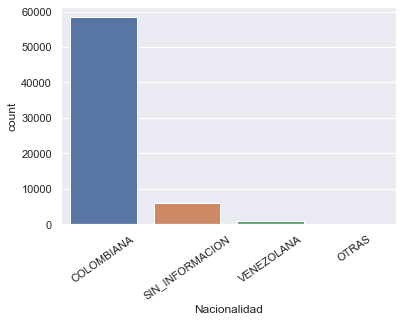

In [ ]:
var_grp = 'Nacionalidad'

# dataframe
df_plot = df_req.copy()
# plot parameters
dims_plot = (8, 5)
rotation_plot = 35

# plot body
ax = sns.countplot(df_plot[var_grp])
sns.set(rc={'figure.figsize':dims_plot})
ax.set_xticklabels(ax.get_xticklabels(),rotation = rotation_plot)
plt.show()

In [ ]:
# revisar información dentro de la variable
var_ref = 'Genero de nacimiento'
df_req[var_ref].value_counts(dropna=False)

MASCULINO    35918
FEMENINO     24962
NaN           4655
Name: Genero de nacimiento, dtype: int64

In [ ]:
# realizar correccion
df_req[var_ref] = np.where(
    (pd.isnull(df_req[var_ref]))|(df_req[var_ref].str.upper().str.strip().isin(['0','NUL','NA','NULL','NaN','-'])) ,
    'SIN_INFORMACION',
    df_req[var_ref].str.upper()
    )
# revisar si el resultado es el deseado
df_req[var_ref].value_counts(dropna=False)

C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\2185074534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req[var_ref] = np.where(


MASCULINO          35918
FEMENINO           24962
SIN_INFORMACION     4655
Name: Genero de nacimiento, dtype: int64

c:\Users\anmmu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


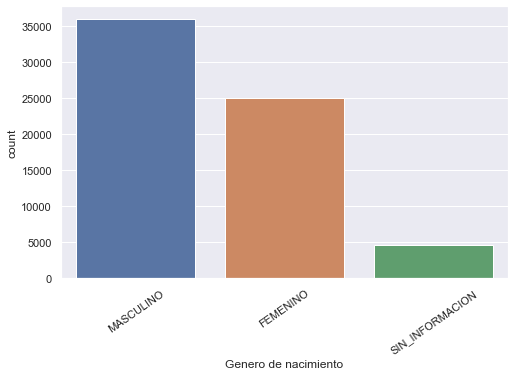

In [ ]:
var_grp = 'Genero de nacimiento'

# dataframe
df_plot = df_req.copy()
# plot parameters
dims_plot = (8, 5)
rotation_plot = 35

# plot body
ax = sns.countplot(df_plot[var_grp])
sns.set(rc={'figure.figsize':dims_plot})
ax.set_xticklabels(ax.get_xticklabels(),rotation = rotation_plot)
plt.show()

In [ ]:
# revisar información dentro de la variable
var_ref = 'Nivel Educativo'
df_req[var_ref].value_counts(dropna=False)

MEDIA ACADEMICA (BACHILLER)    17808
NINGUNO                        10422
NaN                             9046
PROFESIONAL                     8734
TECNICA PROFESIONAL             8642
TECNOLOGICA                     7862
POSTGRADO                       2312
BASICA PRIMARIA                  709
Name: Nivel Educativo, dtype: int64

In [ ]:
var_ref = 'HV con Contrato Activo'
# realizar correccion
df_req[var_ref] = np.where(
    (pd.isnull(df_req[var_ref]))|(df_req[var_ref].str.upper().str.strip().isin(['0','NUL','NA','NULL','NaN','-'])) ,
    'SIN_INFORMACION',
    df_req[var_ref].str.upper()
    )
# revisar si el resultado es el deseado
df_req[var_ref].value_counts(dropna=False)

In [ ]:
# realizar correccion
df_req[var_ref] = np.where(
    (pd.isnull(df_req[var_ref]))|(df_req[var_ref].str.upper().str.strip().isin(['0','NUL','NA','NULL','NaN','-'])) ,
    'SIN_INFORMACION',
    df_req[var_ref].str.upper()
    )
# revisar si el resultado es el deseado
df_req[var_ref].value_counts(dropna=False)

C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\2185074534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req[var_ref] = np.where(


MEDIA ACADEMICA (BACHILLER)    17808
NINGUNO                        10422
SIN_INFORMACION                 9046
PROFESIONAL                     8734
TECNICA PROFESIONAL             8642
TECNOLOGICA                     7862
POSTGRADO                       2312
BASICA PRIMARIA                  709
Name: Nivel Educativo, dtype: int64

c:\Users\anmmu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


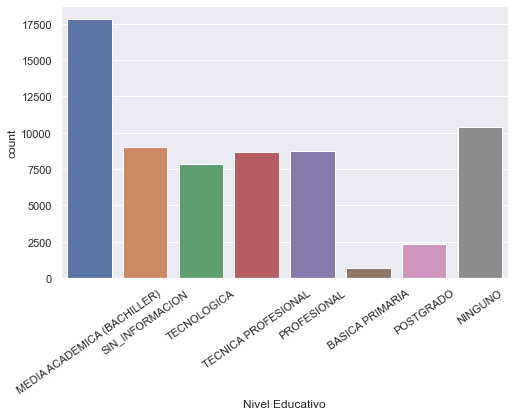

In [ ]:
var_grp = 'Nivel Educativo'

# dataframe
df_plot = df_req.copy()
# plot parameters
dims_plot = (8, 5)
rotation_plot = 35

# plot body
ax = sns.countplot(df_plot[var_grp])
sns.set(rc={'figure.figsize':dims_plot})
ax.set_xticklabels(ax.get_xticklabels(),rotation = rotation_plot)
plt.show()

In [ ]:
# revisar información dentro de la variable
var_ref = 'Departamento de Residencia'
df_req[var_ref].value_counts(dropna=False)

BOGOTA                30420
CUNDINAMARCA           9843
VALLE DEL CAUCA        6158
ANTIOQUIA              5882
NaN                    5319
ATLANTICO              1718
SANTANDER              1126
RISARALDA              1058
BOLIVAR                 994
QUINDIO                 539
BOYACA                  531
TOLIMA                  343
MAGDALENA               243
CALDAS                  222
META                    184
CORDOBA                 180
CESAR                   143
CAUCA                   140
NARIÑO                  127
NORTE DE SANTANDER      102
HUILA                    95
SUCRE                    44
CASANARE                 30
AMAZONAS                 30
LA GUAJIRA               22
CAQUETA                  10
CHOCO                     8
SAN ANDRES                7
ARAUCA                    5
VENEZUELA                 5
PUTUMAYO                  3
GUAVIARE                  1
CUBA                      1
VAUPES                    1
VICHADA                   1
Name: Departamento d

In [ ]:
# realizar correccion
df_req[var_ref] = np.where(
    (pd.isnull(df_req[var_ref]))|(df_req[var_ref].str.upper().str.strip().isin(['0','NUL','NA','NULL','NaN','-'])) ,
    'SIN_INFORMACION',
    df_req[var_ref].str.upper()
    )
# revisar si el resultado es el deseado
df_req[var_ref].value_counts(dropna=False)

C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\2185074534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req[var_ref] = np.where(


BOGOTA                30420
CUNDINAMARCA           9843
VALLE DEL CAUCA        6158
ANTIOQUIA              5882
SIN_INFORMACION        5319
ATLANTICO              1718
SANTANDER              1126
RISARALDA              1058
BOLIVAR                 994
QUINDIO                 539
BOYACA                  531
TOLIMA                  343
MAGDALENA               243
CALDAS                  222
META                    184
CORDOBA                 180
CESAR                   143
CAUCA                   140
NARIÑO                  127
NORTE DE SANTANDER      102
HUILA                    95
SUCRE                    44
CASANARE                 30
AMAZONAS                 30
LA GUAJIRA               22
CAQUETA                  10
CHOCO                     8
SAN ANDRES                7
ARAUCA                    5
VENEZUELA                 5
PUTUMAYO                  3
GUAVIARE                  1
CUBA                      1
VAUPES                    1
VICHADA                   1
Name: Departamento d

In [ ]:
# revisar información dentro de la variable
var_ref = 'Edad' 
pd.isnull(df_req[var_ref]).value_counts(dropna=False)

False    65445
True        90
Name: Edad, dtype: int64

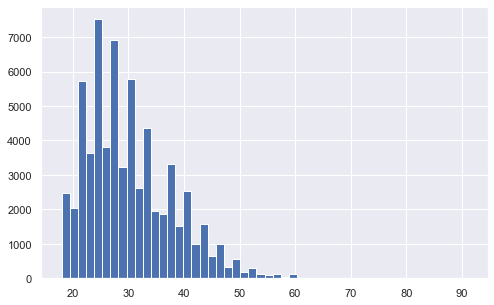

In [ ]:
# dataframe
df_plot = df_req.copy()
var_plot = 'Edad'
# plot body
plt.figure()
plt.hist(df_plot[var_plot], bins = 50)
plt.show()

In [ ]:
# revisar información dentro de la variable
var_ref = 'N° de Hijos'
pd.isnull(df_req[var_ref]).value_counts(dropna=False)

False    49290
True     16245
Name: N° de Hijos, dtype: int64

In [ ]:
# realizar correccion
df_req[var_ref] = np.where(
    (pd.isnull(df_req[var_ref])),
    0,
    df_req[var_ref]
    )
# revisar si el resultado es el deseado
df_req[var_ref].value_counts(dropna=False)

C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\1732558938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req[var_ref] = np.where(


0.0    41921
1.0    12463
2.0     8137
3.0     2336
4.0      510
5.0      122
6.0       46
Name: N° de Hijos, dtype: int64

In [ ]:
# revisar información dentro de la variable
var_ref = 'Cargos'
df_req[var_ref].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                              20329
0 - 0                                                                                                                                                                                                                                                                              722
Taller de confecciones - Operaria de confecciones                                                                                                                                                                                                                                   42
Taller de confecciones - Operario de confecciones                                                                                                                  

In [ ]:
# df_req[var_ref].str.split(',', n=10, expand=True) # si se quisiera cortar
var_ref_1 = 'experiencia'
df_req[var_ref_1] = df_req[var_ref].str.count('\\,') # contar ,
df_req[var_ref_1] = df_req[var_ref_1] +1
df_req[var_ref_1] = np.where(
    (pd.isnull(df_req[var_ref_1])),
    0,
    df_req[var_ref_1]
    )

df_req[[var_ref,var_ref_1]] 

C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\4171833615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req[var_ref_1] = df_req[var_ref].str.count('\\,') # contar ,
C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\4171833615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req[var_ref_1] = df_req[var_ref_1] +1
C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\4171833615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,Cargos,experiencia
0,NaN,0.0
1,Calzado rogger - Solador,1.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
...,...,...
65530,"Ilg - Auxiliar de bodega,Yanbal S. A - Auxilia...",4.0
65531,"COMIDAS VARPEL SAS, - HOME BURGERS - Asistente...",5.0
65532,Servypellet sas - Asistente contable y recurso...,3.0
65533,NaN,0.0


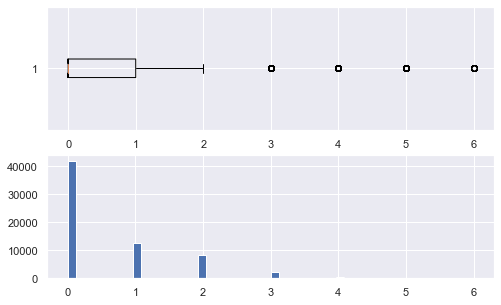

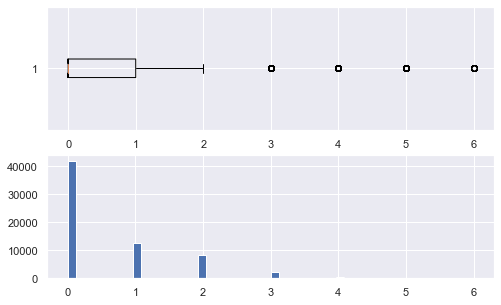

In [ ]:
# dataframe
df_plot = df_req.copy()
var_plot = 'N° de Hijos'
# plot body
plt.figure()
plt.subplot(211)
plt.boxplot(df_plot[var_plot], notch=True, sym="o",vert=False)
plt.subplot(212)
plt.hist(df_plot[var_plot], bins = 50)
plt.show()

# -----------
plt.figure()
plt.subplot(211)
plt.boxplot(df_plot[var_plot], notch=True, sym="o",vert=False)
plt.subplot(212)
plt.hist(df_plot[var_plot], bins = 50)
plt.show()

In [ ]:
df_req.columns

Index(['Tipo de Documento', 'N° Identificación', 'Nacionalidad',
       'Genero de nacimiento', 'Edad', 'N° de Hijos', 'Nivel Educativo',
       'Cargos', 'Departamento de Residencia', 'experiencia'],
      dtype='object')

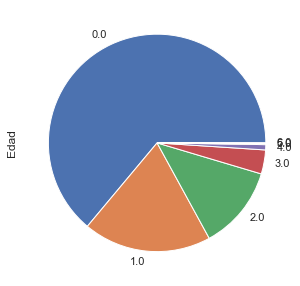

In [ ]:
# dataframe
df_plot = df_req.copy()
var_grp = 'N° de Hijos'
# plot body
df_plot.groupby(var_grp).Edad.agg('count').plot(kind='pie')
plt.show()

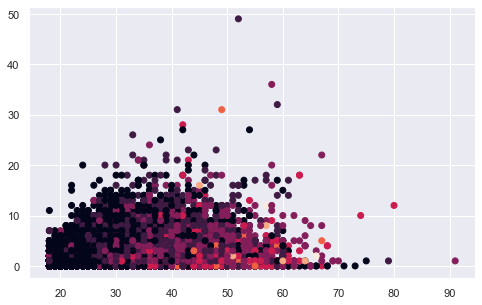

In [ ]:
# dataframe
df_plot = df_req.copy()
var_001 = 'Edad'
var_002 = 'experiencia'
var_grp = 'N° de Hijos'
# plot body
fig, ax = plt.subplots()
ax.scatter(df_plot[var_001], df_plot[var_002], c=df_plot[var_grp])
plt.show()

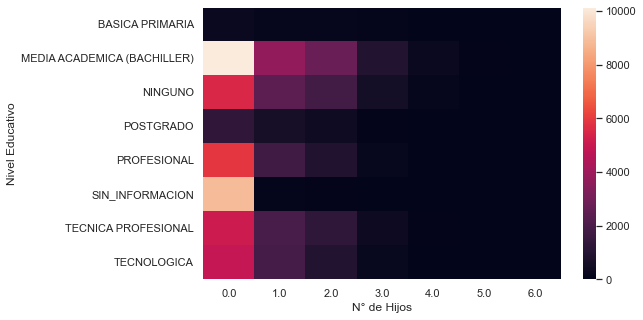

In [ ]:
# dataframe
df_plot = df_req.copy()
var_001 = 'Nivel Educativo'
var_002 = 'N° de Hijos'
# plot body
tab_00 = pd.crosstab(df_plot[var_001],df_plot[var_002])
sns.heatmap(tab_00)
plt.show()

[Text(0, 0, 'MEDIA ACADEMICA (BACHILLER)'),
 Text(1, 0, 'NINGUNO'),
 Text(2, 0, 'SIN_INFORMACION'),
 Text(3, 0, 'PROFESIONAL'),
 Text(4, 0, 'TECNICA PROFESIONAL'),
 Text(5, 0, 'TECNOLOGICA'),
 Text(6, 0, 'POSTGRADO'),
 Text(7, 0, 'BASICA PRIMARIA')]

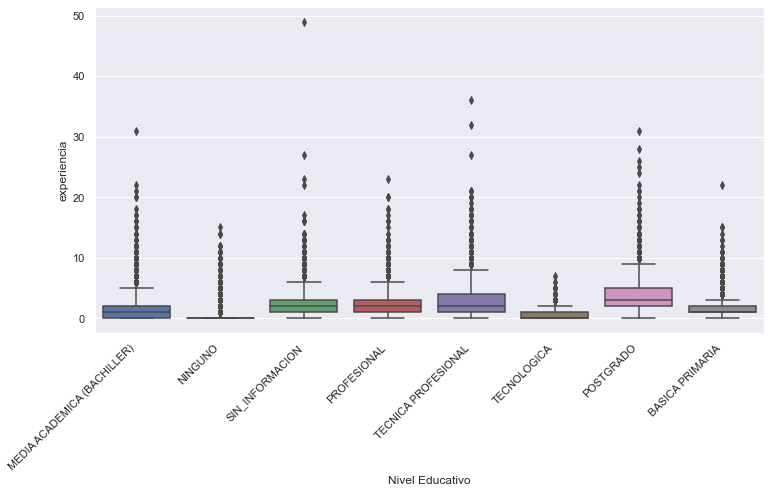

In [ ]:
var_y = 'experiencia'
var_x = 'Nivel Educativo'
# dataframe
df_plot = df_req.copy()
df_plot_2 = df_plot[var_x].value_counts().index
# plot body
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.boxplot(x=var_x, y=var_y, data=df_plot)
ax.set_xticklabels(labels=df_plot_2, rotation=45, ha='right')

<AxesSubplot:xlabel='Edad', ylabel='experiencia'>

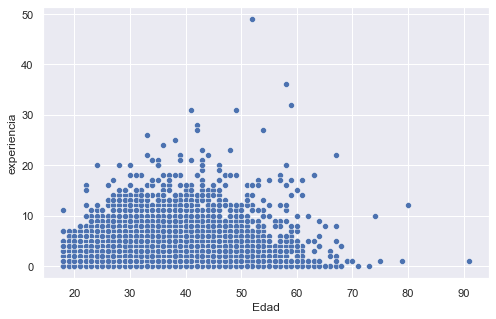

In [ ]:
# dataframe
df_plot = df_req.copy()
var_y = 'experiencia'
var_x = 'Edad'
# plot body
sns.scatterplot(data=df_plot, x=var_x, y=var_y)

In [ ]:
# realizar correccion
var_ref = 'experiencia'
var_ref_1 = 'experiencia_mod'

df_req[var_ref_1] = np.where(
    df_req[var_ref]>10,
    10,
    df_req[var_ref]
    )
# revisar si el resultado es el deseado
df_req[var_ref_1].value_counts(dropna=False)

C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\3506608723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req[var_ref_1] = np.where(


0.0     20329
1.0     17216
2.0      9755
3.0      7835
4.0      4301
5.0      2451
6.0      1441
7.0       854
10.0      556
8.0       483
9.0       314
Name: experiencia_mod, dtype: int64

## Training and test dataset

In [ ]:
from sklearn import set_config
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer, RobustScaler, MinMaxScaler


In [ ]:
# quitar datos atipicos
df_completo = df_req.copy()
semilla = 20090630

list_vars_obj = 'N° de Hijos'
list_vars_num = [
    'Edad',
    # 'N° de Hijos',
    'experiencia_mod'
    ]
list_vars_cat = [
    'Nacionalidad',
    'Nivel Educativo',
    'Departamento de Residencia',
    'Genero de nacimiento'
    ]


X = df_completo[list_vars_num+list_vars_cat]
y = df_completo[list_vars_obj]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.20, 
    random_state=semilla,
    # stratify=y,
    )

## Model training and tuning

In [ ]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler()),
                            ('biner', KBinsDiscretizer(
                                n_bins=10,
                                encode='ordinal',
                                strategy='quantile'
                            ))
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

c:\Users\anmmu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [ ]:
# # Convertir el output en dataframe y añadir el nombre de las columnas
# # ==============================================================================
# encoded_cat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names(cat_cols)
# labels = np.concatenate([numeric_cols, encoded_cat])
# datos_X_train_prep = pd.DataFrame(X_train_prep.todense(), columns=labels)
# datos_X_train_prep.columns


In [ ]:

set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler()),
                                                 ('biner',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=10))]),
                                 ['Edad', 'experiencia_mod']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Nacionalidad', 'Nivel Educativo',
                                  'Departamento de Residencia',
                                  'Genero de nacimiento'])])

In [ ]:
#   Ajustar luego de crear
set_config(display='text')

# Model performance Benchmark

In [ ]:
# Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
# classification
from sklearn.metrics import auc,roc_curve
# regression
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, mean_poisson_deviance, mean_gamma_deviance, mean_absolute_percentage_error, r2_score

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, ARDRegression, SGDRegressor, Lars, LassoLars, OrthogonalMatchingPursuit, HuberRegressor, RANSACRegressor, TheilSenRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

In [ ]:
# funcion para nconsolidar desempeño de un modelo de regresion en varias metricas
def metricas_regr(Nombre_modelo,y_test,y_pred,X_test, time=''):
    test_explained_variance_score = explained_variance_score(y_test, y_pred, multioutput='uniform_average')
    test_max_error = max_error(y_test, y_pred)
    test_mean_absolute_error = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
    test_mean_squared_error = mean_squared_error(y_test, y_pred)
    test_mean_squared_log_error = ('N/A' if min([min(y_test),min(y_pred)])<0 else mean_squared_log_error(y_test, y_pred))
    test_median_absolute_error = median_absolute_error(y_test, y_pred)
    test_mean_poisson_deviance = ('N/A' if min([min(y_test),min(y_pred)])<0 else mean_poisson_deviance(y_test, y_pred))
    test_mean_gamma_deviance = ('N/A' if min([min(y_test),min(y_pred)])<0 else mean_gamma_deviance(y_test, y_pred))
    test_mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
    test_r2_score = r2_score(y_test, y_pred)
    n_features = X_test.shape[1]
    n_obs = len(y_test)
    test_r2_adj_score = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    test_score_rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    df_metricas = pd.DataFrame(
        [[Nombre_modelo,test_r2_score,test_r2_adj_score,test_explained_variance_score,test_max_error,test_score_rmse,test_mean_squared_error,test_mean_absolute_error,test_mean_absolute_percentage_error,test_median_absolute_error,test_mean_squared_log_error,test_mean_poisson_deviance,test_mean_gamma_deviance,time,n_features,n_obs]],
        columns=[['Modelo','R_2','R_2_adj','Explained Variance','Max Error','RMSE','MSE','MAE','MAPE','MedAE','MSLE','mean poisson dev','mean gamma dev','time','features','rows']]
        )
    return df_metricas
# este plot....
def plot_diagn_resid(y_actual,y_pred):
    # Diagnóstico errores (residuos) de las predicciones de entrenamiento
    # ==============================================================================
    residuals = y_pred - y_actual

    # Gráficos
    # ==============================================================================
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

    axes[0, 0].scatter(y_actual, y_pred, edgecolors=(0, 0, 0), alpha = 0.4)
    axes[0, 0].plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()],
                    'k--', color = 'black', lw=2)
    axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 7)

    axes[0, 1].scatter(list(range(len(y_actual))), residuals,
                    edgecolors=(0, 0, 0), alpha = 0.4)
    axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
    axes[0, 1].set_xlabel('id')
    axes[0, 1].set_ylabel('Residuo')
    axes[0, 1].tick_params(labelsize = 7)

    sns.histplot(
        data    = residuals,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "firebrick",
        alpha   = 0.3,
        ax      = axes[1, 0]
    )

    axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                        fontweight = "bold")
    axes[1, 0].set_xlabel("Residuo")
    axes[1, 0].tick_params(labelsize = 7)


    sm.qqplot(
        residuals,
        fit   = True,
        line  = 'q',
        ax    = axes[1, 1], 
        color = 'firebrick',
        alpha = 0.4,
        lw    = 2
    )
    axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
    axes[1, 1].tick_params(labelsize = 7)

    axes[2, 0].scatter(y_pred, residuals,
                    edgecolors=(0, 0, 0), alpha = 0.4)
    axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
    axes[2, 0].set_xlabel('Predicción')
    axes[2, 0].set_ylabel('Residuo')
    axes[2, 0].tick_params(labelsize = 7)

    # Se eliminan los axes vacíos
    fig.delaxes(axes[2,1])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


def plot_benckmark_models_1_100(df_scores_original,column_label,column_score):
    df_scores = df_scores_original.copy()
    df_scores.columns = df_scores.columns.get_level_values(0)
    df_scores['metrica_ref'] = df_scores[column_score]
    df_scores['modelo_ref'] = df_scores[column_label]
    df_scores = df_scores.sort_values(by=['metrica_ref'], ascending=True)
    df_scores = df_scores.query('metrica_ref >= 0 & metrica_ref < 1').query('modelo_ref.str.endswith("test")')

    fig, ax = plt.subplots(figsize=(6, 3.84))
    ax.hlines(df_scores.modelo_ref, xmin=0, xmax=df_scores.metrica_ref)
    ax.plot(df_scores.metrica_ref, df_scores.modelo_ref, "o", color='black')
    ax.tick_params(axis='y', which='major', labelsize=12)
    ax.set_title('Comparación del desempeño de los modelos'),
    ax.set_xlabel('Score: '+column_score);

# funciona para generar matriz de benchmarking inicial vacía
def new_metricas_regr():
    matrizResultados = pd.DataFrame(columns=[['Modelo','R_2','R_2_adj','Explained Variance','Max Error','RMSE','MSE','MAE','MAPE','MedAE','MSLE','mean poisson dev','mean gamma dev','time','features','rows']])
    return matrizResultados

In [ ]:
# matriz de benchmarking inicial vacía
matrizResultados = new_metricas_regr()

### Modelo 001

C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\1791306248.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrizResultados = matrizResultados.append(metricas_regr(Nombre_modelo+'_train',y_train, y_pred_train,X_train_prep,time_lapse), ignore_index=True)
C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\1791306248.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrizResultados = matrizResultados.append(metricas_regr(Nombre_modelo+'_test',y_test, y_pred,X_test_prep,time_lapse), ignore_index=True)


Se ha guardado los resultados para el modelo : OLSLinearRegression


C:\Users\anmmu\AppData\Local\Temp\ipykernel_11840\3084410065.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()],
c:\Users\anmmu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\Users\anmmu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9339578747749329, pvalue=0.0)
Estadítico K-squared= 2802.7056584071147, p-value = 0.0


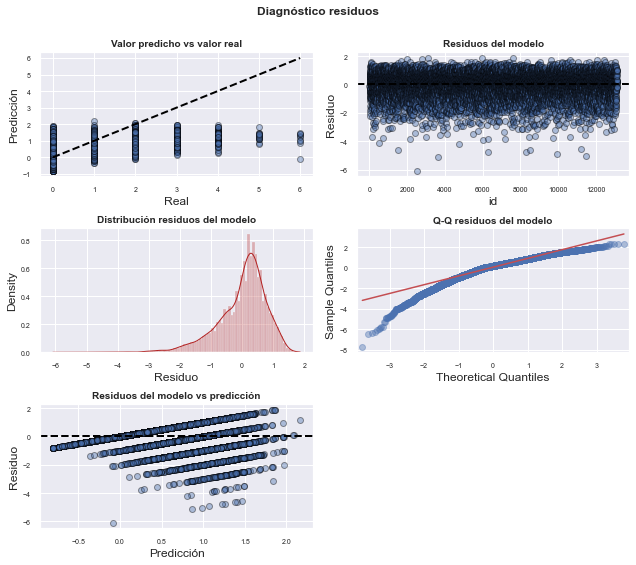

In [ ]:
# Modelo que se pretende entrenar
Nombre_modelo = 'OLSLinearRegression'

# hyper params
params = {
    "fit_intercept": True,
    "positive": False,
    'n_jobs' : -1
}

# Create linear regression object
OLSRegr_001 = LinearRegression(**params)
# Train the model using the training sets
time_before = datetime.now()
OLSRegr_001.fit(X_train_prep, y_train)
time_after = datetime.now()
time_lapse = str(time_after-time_before)
# Make predictions using the testing set
y_pred_train = OLSRegr_001.predict(X_train_prep)
y_pred = OLSRegr_001.predict(X_test_prep)

# matriz de Resultados
# ==============================================================================
matrizResultados = matrizResultados.append(metricas_regr(Nombre_modelo+'_train',y_train, y_pred_train,X_train_prep,time_lapse), ignore_index=True)
matrizResultados = matrizResultados.append(metricas_regr(Nombre_modelo+'_test',y_test, y_pred,X_test_prep,time_lapse), ignore_index=True)

print('Se ha guardado los resultados para el modelo :',Nombre_modelo)

# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
plot_diagn_resid(y_test,y_pred)

# Pruebas de Normalidad de los residuos
# hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.
# ==============================================================================

# # Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
y_residuals = y_pred - y_test
shapiro_test = stats.shapiro(y_residuals)
print(shapiro_test)

# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(y_residuals)
print(f"Estadítico K-squared= {k2}, p-value = {p_value}")

In [ ]:
matrizResultados.sort_index(ascending=False).head(10)

,Modelo,R_2,R_2_adj,Explained Variance,Max Error,RMSE,MSE,MAE,MAPE,MedAE,MSLE,mean poisson dev,mean gamma dev,time,features,rows
1,OLSLinearRegression_test,0.254576,0.251721,0.254829,6.083257,0.790072,0.624214,0.598725,1433242163351784.75,0.470865,N/A,N/A,N/A,0:00:00.200494,50,13107
0,OLSLinearRegression_train,0.258363,0.257655,0.258363,6.014694,0.798771,0.638034,0.602995,1413095913180696.75,0.474181,N/A,N/A,N/A,0:00:00.200494,50,52428


In [ ]:
matrizResultados.sort_index(ascending=False).head(10)

,Modelo,R_2,R_2_adj,Explained Variance,Max Error,RMSE,MSE,MAE,MAPE,MedAE,MSLE,mean poisson dev,mean gamma dev,time,features,rows
1,OLSLinearRegression_test,0.206895,0.203858,0.206934,9.726363,1.750841,3.065446,1.266347,1695301420462171.0,0.954826,N/A,N/A,N/A,0:00:00.188922,50,13107
0,OLSLinearRegression_train,0.211696,0.210944,0.211696,10.083396,1.753623,3.075193,1.26185,1649941007668143.5,0.946049,N/A,N/A,N/A,0:00:00.188922,50,52428


In [ ]:
matrizResultados.sort_index(ascending=False).head(10)

,Modelo,R_2,R_2_adj,Explained Variance,Max Error,RMSE,MSE,MAE,MAPE,MedAE,MSLE,mean poisson dev,mean gamma dev,time,features,rows
1,OLSLinearRegression_test,0.193603,0.190515,0.193631,32.798535,1.897186,3.599313,1.295111,1.717549e+15,0.961759,N/A,N/A,N/A,0:00:00.134913,50,13107
0,OLSLinearRegression_train,0.197558,0.196792,0.197558,46.194843,1.888659,3.567033,1.288497,1.671047e+15,0.955947,N/A,N/A,N/A,0:00:00.134913,50,52428
